# Colab 데이터 로드

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['와인.csv']),
                       encoding='cp949')
src_data

# 로컬 데이터 로드

In [1]:
import pandas as pd
src_data = pd.read_csv('와인.csv', encoding='cp949')
src_data

,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


# 공통 실습 코드

In [7]:
#Step 2.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다
import numpy as np
data = src_data[['알콜도수','당도','산도_ph']].to_numpy()

# '레드와인':0, '화이트와인':1 mapping
target = src_data['종류'].map({'레드와인':0, '화이트와인':1})
print(target.value_counts())
print(sum(target.isna()))

# train, test 분리
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=40)

종류
1    4898
0    1599
Name: count, dtype: int64
0


In [10]:
# 필요 라이브러리 import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백 생성
checkpoint = ModelCheckpoint('best_model_wine.keras', save_best_only=True, monitor='val_loss', mode='min')

# 모델 생성
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', Precision(), Recall()])

# 모델 학습
model.fit(train_data, train_target, epochs=100, batch_size=20,
          validation_split=0.2,callbacks=[checkpoint])

Epoch 1/100


c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7641 - loss: 0.1525 - precision_1: 0.7648 - recall_1: 0.9946 - val_accuracy: 0.8567 - val_loss: 0.1104 - val_precision_1: 0.9070 - val_recall_1: 0.9012
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8423 - loss: 0.1147 - precision_1: 0.8736 - recall_1: 0.9249 - val_accuracy: 0.8413 - val_loss: 0.1056 - val_precision_1: 0.9205 - val_recall_1: 0.8626
Epoch 3/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8445 - loss: 0.1120 - precision_1: 0.8880 - recall_1: 0.9080 - val_accuracy: 0.8625 - val_loss: 0.0953 - val_precision_1: 0.9141 - val_recall_1: 0.9012
Epoch 4/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8618 - loss: 0.1027 - precision_1: 0.9053 - recall_1: 0.9134 - val_accuracy: 0.8615 - val_loss: 0.0965 - val_precision_1: 0.9183 - val_recall_1: 0.8947
Epoch 5/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.0992 - precision_1: 0.9005 - recall_1: 0.9087 - val_ac

In [11]:
from sklearn.metrics import classification_report

# 예측확률을 0, 1값으로 변환
predicted = model.predict(test_data)
predicted_labels = (predicted > 0.5).astype(int)

# classification_report 출력
report = classification_report(test_target, predicted_labels)
print(report)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       320
           1       0.90      0.93      0.91       980

    accuracy                           0.86      1300
   macro avg       0.82      0.80      0.81      1300
weighted avg       0.86      0.86      0.86      1300



41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


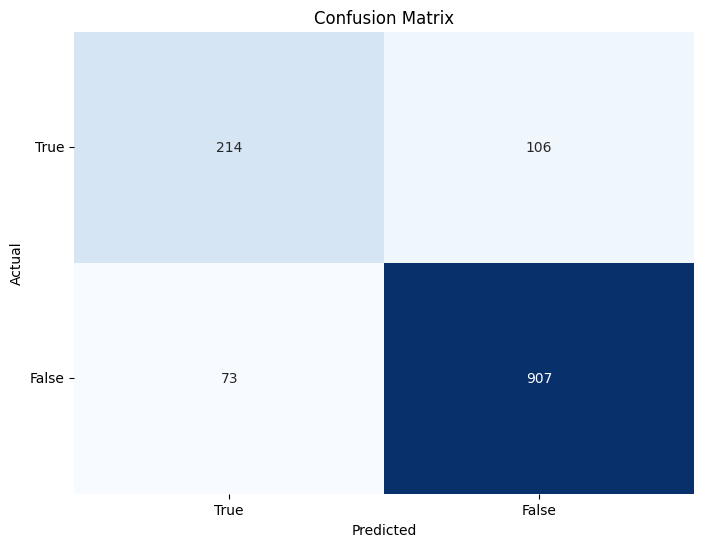

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 실제 라벨과 예측 라벨
actual = test_target
predicted = model.predict(test_data)
predicted_labels = (predicted > 0.5).astype(int)

# 혼동 행렬 계산
cm = confusion_matrix(actual, predicted_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(2) + 0.5, ['True', 'False'])
plt.yticks(np.arange(2) + 0.5, ['True', 'False'], rotation=0)
plt.title('Confusion Matrix')
plt.show()

# Callback 사용

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 생성
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 학습된 가중치 불러오기
model.load_weights('best_model_wine.keras')

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', Precision(), Recall()])

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# 모델 평가
results = model.evaluate(test_data, test_target)
print(f'loss: {results[0]} accuracy: {results[1]} precision: {results[2]} recall: {results[3]}')

# 예측
model.predict(tf.constant([[9.4, 1.8, 3.5]]))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8526 - loss: 0.1053 - precision_2: 0.8970 - recall_2: 0.9079 
loss: 0.10216907411813736 accuracy: 0.8623076677322388 precision: 0.9017050862312317 recall: 0.9173469543457031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.08571302]], dtype=float32)